In [0]:
!mkdir train_img
!unzip -d train_img train_images.zip

# Purpose of this notebook,

## Auto crop the image to increase accuracy during training

In [0]:
import os 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.preprocessing import image
import cv2
import seaborn as sns

In [0]:
train_df = pd.read_csv('train.csv')

In [7]:
train_df.head()

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


In [0]:
train_df['img_path'] = train_df['id_code'].apply(lambda x: x+ '.png')

In [9]:
train_df.head()

,id_code,diagnosis,img_path
0,000c1434d8d7,2,000c1434d8d7.png
1,001639a390f0,4,001639a390f0.png
2,0024cdab0c1e,1,0024cdab0c1e.png
3,002c21358ce6,0,002c21358ce6.png
4,005b95c28852,0,005b95c28852.png


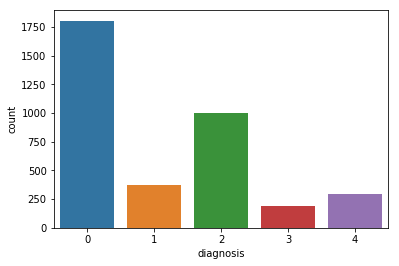

In [13]:
sns.countplot('diagnosis', data = train_df)

In [0]:
diag_0 = train_df[train_df['diagnosis']==0].sample(5)
diag_1 = train_df[train_df['diagnosis']==1].sample(5)
diag_2 = train_df[train_df['diagnosis']==2].sample(5)
diag_3 = train_df[train_df['diagnosis']==3].sample(5)
diag_4 = train_df[train_df['diagnosis']==4].sample(5)

diag_sample = [diag_0, diag_1, diag_2, diag_3, diag_4]
diag_sample_df = pd.concat(diag_sample)

In [20]:
diag_sample_df.head()

,id_code,diagnosis,img_path
1277,58eb3809f456,0,58eb3809f456.png
91,07596907347b,0,07596907347b.png
1077,4ccee4db09b6,0,4ccee4db09b6.png
2614,b598bc9753c2,0,b598bc9753c2.png
1283,598b8f5b3822,0,598b8f5b3822.png


In [0]:
diag_sample_df

In [33]:
rows = 5
cols = 5 
fig = plt.figure(figsize=(rows *5, cols *5))
for indices, imgs in enumerate(diag_sample_df['img_path']):
  img_path = f"/content/train_img/{imgs}"
  img = plt.imread(img_path)
  fig.add_subplot(rows, cols, indices+1)
  plt.imshow(img)

Output hidden; open in https://colab.research.google.com to view.

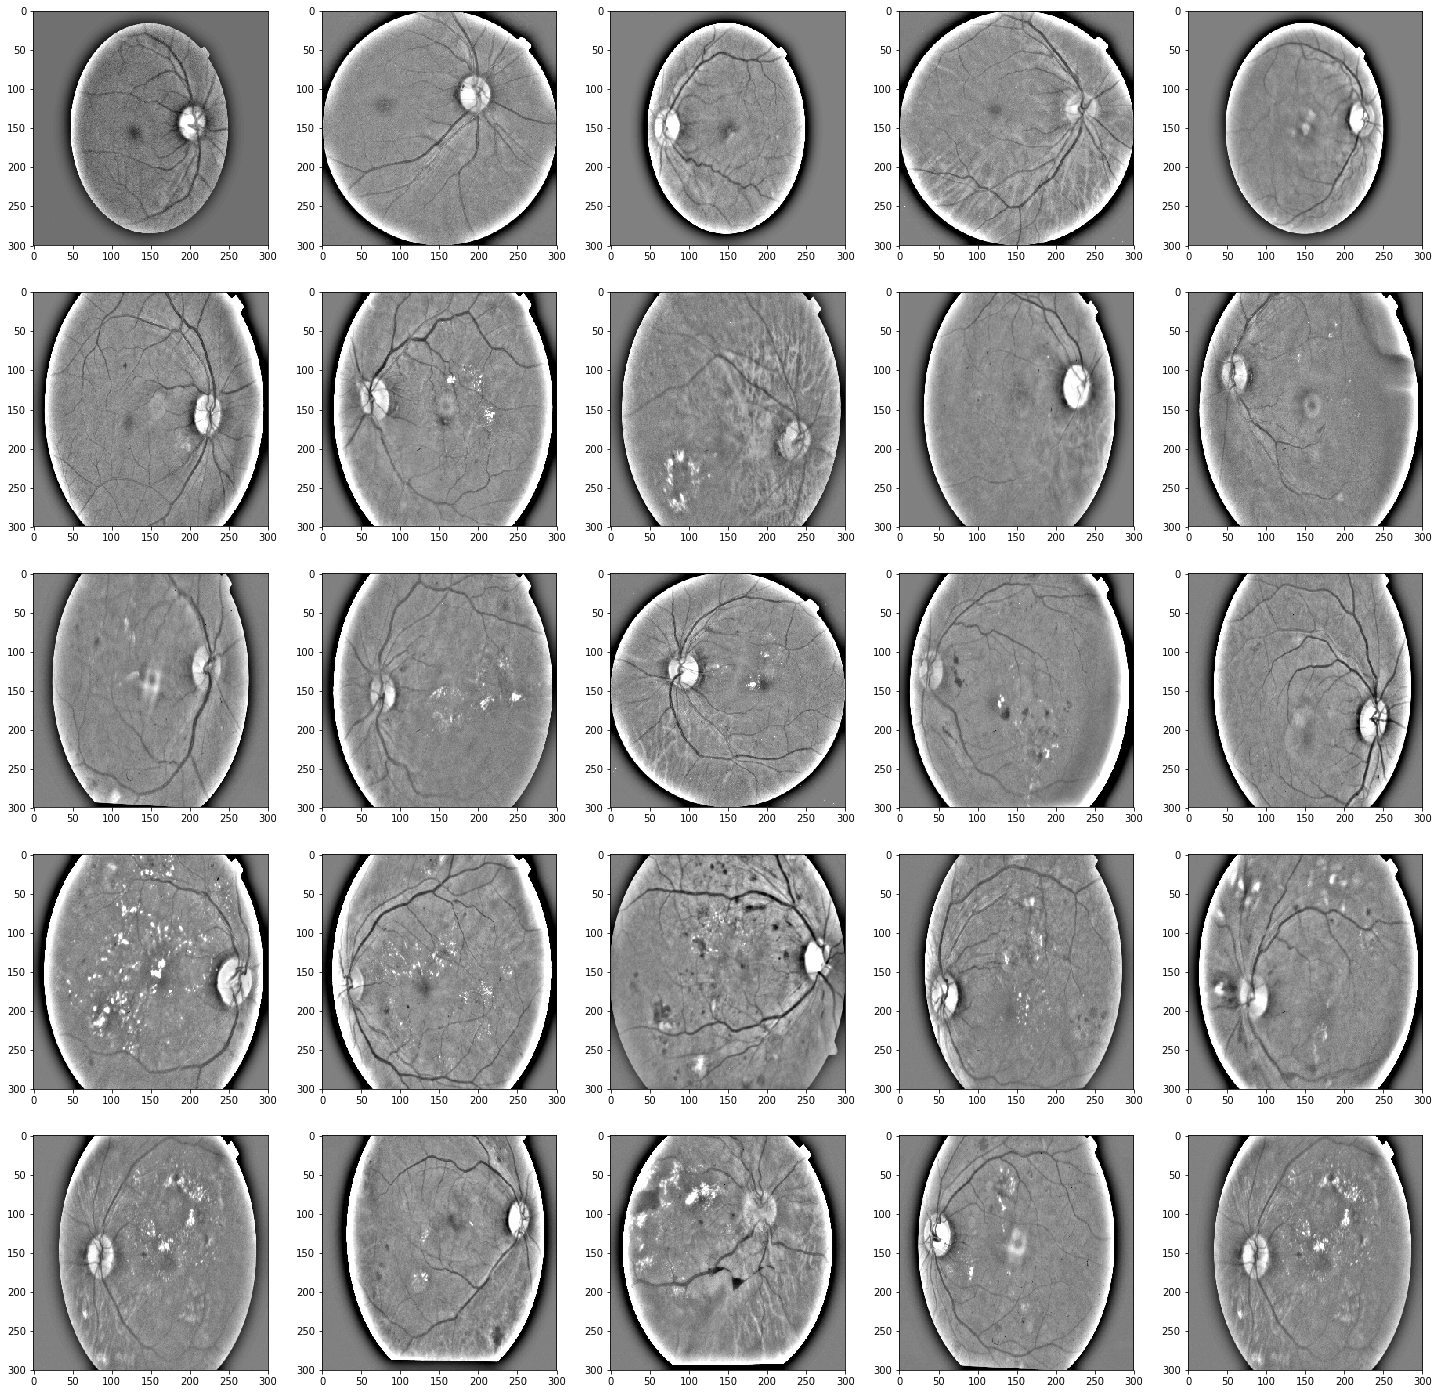

In [34]:
rows = 5
cols = 5 
fig = plt.figure(figsize=(rows *5, cols *5))
for indices, imgs in enumerate(diag_sample_df['img_path']):
  img_path = f"/content/train_img/{imgs}"
  img = cv2.imread(img_path)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img = cv2.resize(img, (300, 300), interpolation=cv2.INTER_LINEAR)
  img = cv2.addWeighted(img, 4, cv2.GaussianBlur(img, (0,0), sigmaX=10), -4, 128)

  fig.add_subplot(rows, cols, indices+1)
  plt.imshow(img, cmap='gray')

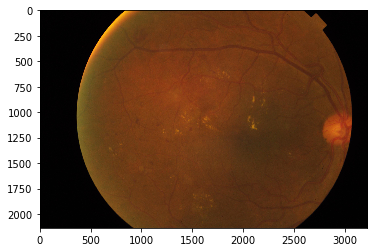

In [36]:
img_test = plt.imread('/content/train_img/000c1434d8d7.png')
plt.imshow(img_test)

In [0]:
img_test= image.load_img('/content/train_img/000c1434d8d7.png')
img_array = image.img_to_array(img_test)

In [80]:
img_array.shape

(2136, 3216, 3)

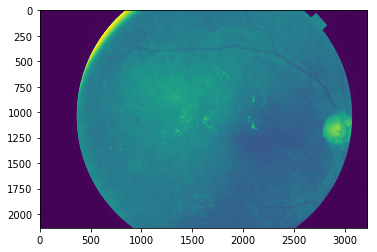

In [81]:
plt.imshow(img_array[:, :, 0])

In [82]:
img_array.ndim 

3

In [0]:
img_black = cv2.cvtColor(img_array, cv2.COLOR_RGB2GRAY)

In [87]:
img_black.shape

(2136, 3216)

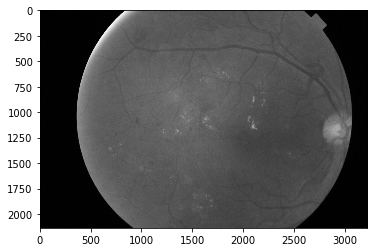

In [89]:
plt.imshow(img_black, cmap='gray')

In [0]:
def crop_image_from_gray(img, tol=7):
  if img.ndim == 2:
    mask = img > tol
    return img[np.ix_(mask.any(1), mask.any(0))]

  elif img.ndim ==3:
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    mask = gray_img > tol
    check_shape = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))].shape[0]

    if (check_shape == 0):
      return img
    else :
      img1 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
      img2 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
      img3 = img[:, :, 0][np.ix_(mask.any(1), mask.any(0))]
      img = np.stack([img1, img2, img3], axis=-1)
    return img

In [0]:
test_crop = crop_image_from_gray(img_black)

In [91]:
test_crop.shape

(2136, 2710)

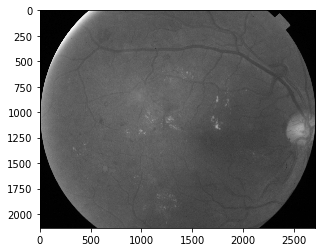

In [93]:
plt.imshow(test_crop, cmap='gray')

In [0]:
test_crop_color = cv2.cvtColor(test_crop, cv2.COLOR_GRAY2RGB)

In [96]:
test_crop_color.shape

(2136, 2710, 3)

W0829 04:32:18.018228 140553629017984 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


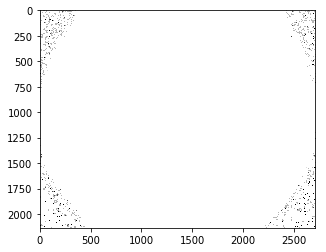

In [108]:
plt.imshow(test_crop_color)

In [0]:
img_array = cv2.imread('/content/train_img/000c1434d8d7.png')

In [0]:
img_crop = crop_image_from_gray(img_array)

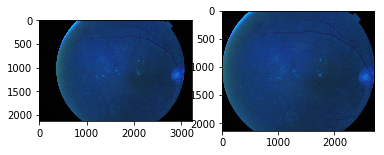

In [115]:
plt.subplot(121)
plt.imshow(img_array)
plt.subplot(122)
plt.imshow(img_crop)

In [0]:
def crop_image_from_gray(img, tol=7):
    """
    Applies masks to the orignal image and 
    returns the a preprocessed image with 
    3 channels
    """
    # If for some reason we only have two channels
    if img.ndim == 2:
        mask = img > tol
        return img[np.ix_(mask.any(1),mask.any(0))]
    # If we have a normal RGB images
    elif img.ndim == 3:
        gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
        mask = gray_img > tol
        
        check_shape = img[:,:,0][np.ix_(mask.any(1),mask.any(0))].shape[0]
        if (check_shape == 0): # image is too dark so that we crop out everything,
            return img # return original image
        else:
            img1=img[:,:,0][np.ix_(mask.any(1),mask.any(0))]
            img2=img[:,:,1][np.ix_(mask.any(1),mask.any(0))]
            img3=img[:,:,2][np.ix_(mask.any(1),mask.any(0))]
            img = np.stack([img1,img2,img3],axis=-1)
        return img

def preprocess_image(image, sigmaX=10):
    """
    The whole preprocessing pipeline:
    1. Read in image
    2. Apply masks
    3. Resize image to desired size
    4. Add Gaussian noise to increase Robustness
    """
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = crop_image_from_gray(image)
    image = cv2.resize(image, (300, 300))
    image = cv2.addWeighted (image,4, cv2.GaussianBlur(image, (0,0) ,sigmaX), -4, 128)
    return image

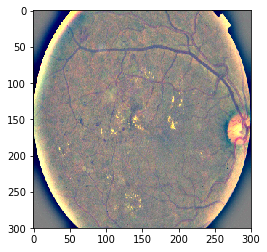

In [105]:
plt.imshow(preprocess_image(cv2.imread('/content/train_img/000c1434d8d7.png')))